# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

## Let's Begin

### Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [2]:
df=pd.read_csv('Customer_Behaviour.csv')

### View the top 5 rows

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### View info of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [9]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### View unique values in Gender

In [11]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Gender column

In [4]:
def Gender(x):
    if x=='Male':
        return 1
    else:
        return 0

In [5]:
df['Gender']=df['Gender'].apply(Gender)

In [6]:
df['Gender'].unique()

array([1, 0], dtype=int64)

In [18]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


#### Drop user ID column

In [7]:
df.drop(columns=['User ID'],inplace=True)

In [21]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

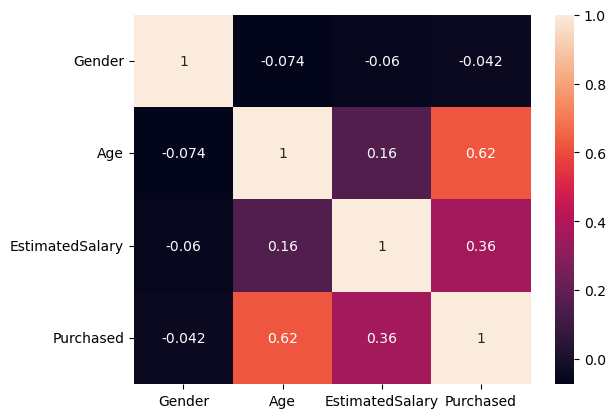

In [22]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### Plot a countplot of gender with respect to purchased

<AxesSubplot:xlabel='Gender', ylabel='count'>

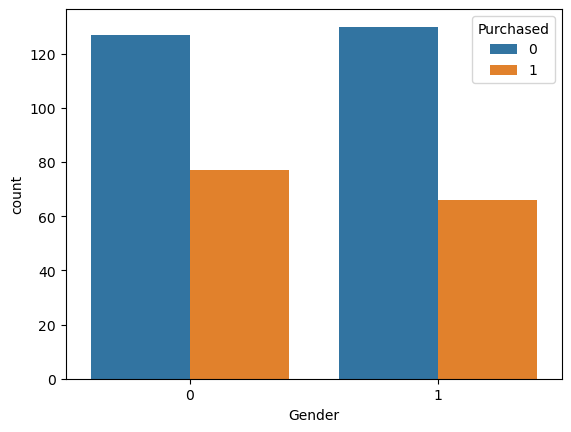

In [24]:
sns.countplot(data=df,x='Gender',hue='Purchased')

### Plot a displot of Age

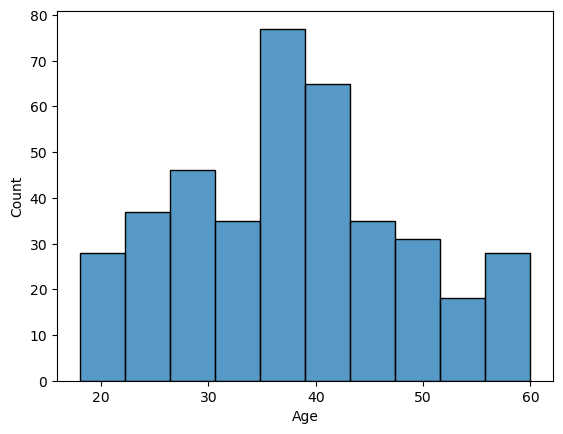

In [27]:
sns.histplot(data=df,x='Age')
plt.show()

### Plot pairplot of the dataset

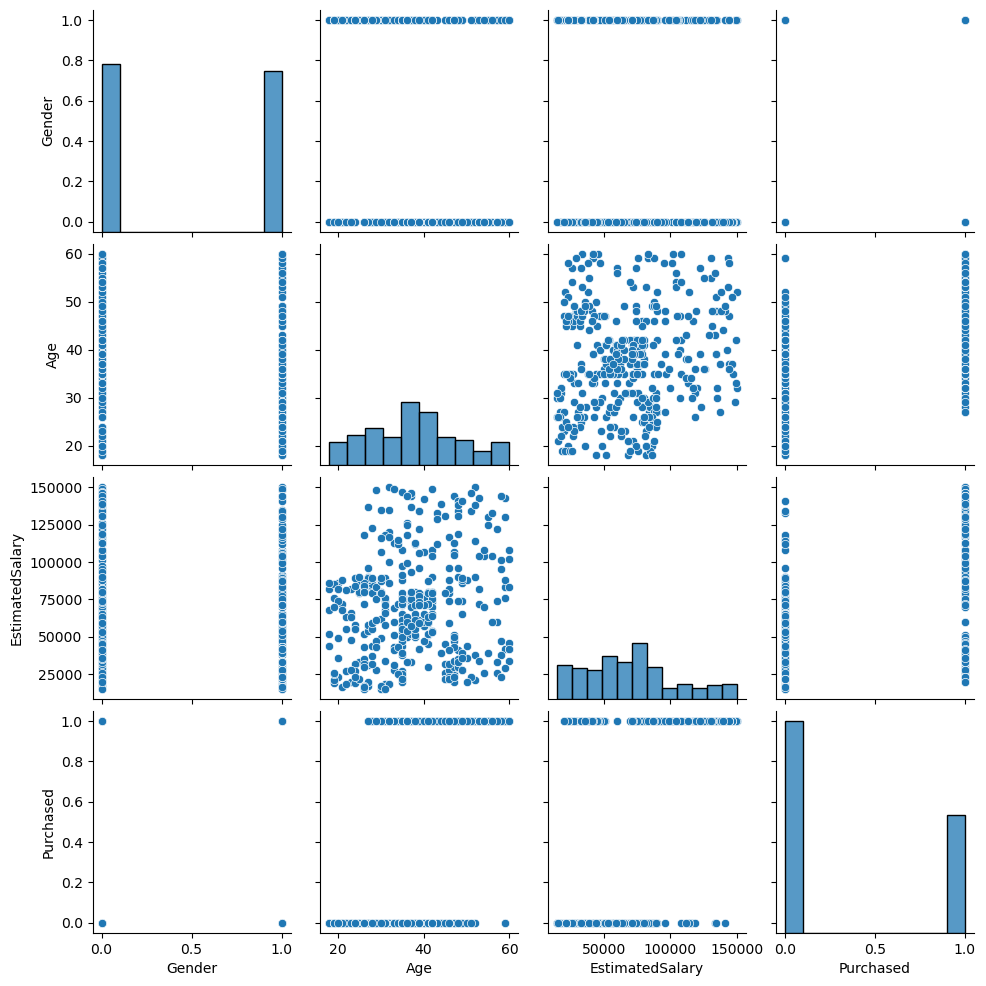

In [29]:
sns.pairplot(data=df)
plt.show()

## Data Preprocessing

### Split the dataset into input and target variables

In [8]:
x=df.drop(columns=['Purchased'])
y=df['Purchased']

### Scale the data using StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

In [12]:
x_scaled=scaler.fit_transform(x)

In [13]:
X=pd.DataFrame(data=x_scaled,columns=x.columns)

In [14]:
X.head()

,Gender,Age,EstimatedSalary
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751


### Split the dataset into training and testing set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

### Check shape of X_train and X_test

In [17]:
X_train.shape

(280, 3)

In [18]:
X_test.shape

(120, 3)

## ML Models

### Logistic Regression Classifier

In [19]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [21]:
model=LogisticRegression()


In [24]:
model.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred=model.predict(X_test)

In [29]:
model.score(X_train,y_train)

0.8535714285714285

In [30]:
metrics.accuracy_score(y_test,y_pred)

0.8166666666666667

In [31]:
metrics.confusion_matrix(y_test,y_pred)

array([[71,  9],
       [13, 27]], dtype=int64)

In [33]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        80
           1       0.75      0.68      0.71        40

    accuracy                           0.82       120
   macro avg       0.80      0.78      0.79       120
weighted avg       0.81      0.82      0.81       120



In [35]:
cross_val_score(model,X_train,y_train)

array([0.85714286, 0.82142857, 0.89285714, 0.83928571, 0.85714286])

### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model=RandomForestClassifier(n_estimators=20)

In [41]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [42]:
model.score(X_train,y_train)

1.0

In [43]:
metrics.accuracy_score(y_test,y_pred)

0.8166666666666667

In [44]:
metrics.confusion_matrix(y_test,y_pred)

array([[71,  9],
       [13, 27]], dtype=int64)

In [46]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        80
           1       0.75      0.68      0.71        40

    accuracy                           0.82       120
   macro avg       0.80      0.78      0.79       120
weighted avg       0.81      0.82      0.81       120



In [48]:
cross_val_score(model,X_train,y_train).mean()

0.8892857142857142

### Support Vector Machine

In [49]:
from sklearn.svm import SVC

In [51]:
model=SVC()

In [52]:
model.fit(X_train,y_train)

SVC()

In [53]:
model.score(X_train,y_train)

0.9142857142857143

In [54]:
metrics.accuracy_score(y_test,y_pred)

0.8166666666666667

In [55]:
metrics.confusion_matrix(y_test,y_pred)

array([[71,  9],
       [13, 27]], dtype=int64)

In [57]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        80
           1       0.75      0.68      0.71        40

    accuracy                           0.82       120
   macro avg       0.80      0.78      0.79       120
weighted avg       0.81      0.82      0.81       120



In [59]:
cross_val_score(model,X_train,y_train).mean()

0.9142857142857144

### Assign cross val scores of all models into a dataframe

In [64]:
dict1={'Model':['Support Vector Machine','Random Forest','Logistic Regression'],'scores':[0.903333,0.890000,0.836667]}

In [66]:
pd.DataFrame(data=dict1,index=[2,1,0])

,Model,scores
2,Support Vector Machine,0.903333
1,Random Forest,0.890000
0,Logistic Regression,0.836667


***

## Deploy the model with highest score using Tkinter

In [75]:
### In this case its SVM Classifier

#### Import all modules from Tkinter

In [67]:
from tkinter import *
from tkinter.ttk import Combobox

### Define a function that will output to an entry box in Tkinter

In [69]:
def getpredict():
    Age1=int(Age.get())
    Gender1=Gender.get()
    EstimatedSalary1=int( EstimatedSalary.get())
    resultbox.delete(o,END)
    
    if Gender.get()==1:
        Mle=1
        Female=0
    else:
        Male=0
        Female=1
        
    result=model.predict(Scaler.transform([[Age1,EstimatedSalary1,Gender1]]))
    if resultbox[0]==1:
        resultbox.insert(0,'Purchased')
    elif result[0]==0:
        resultbox.insert(0,' Not Purchased')
    else:
        resultbox.insert(0,'Error')

### Create Tkinter window with all necessary entryboxes and labels

In [68]:
window=Tk()
window.mainloop()

***

# <span style = "color:green;font-size:40px"> Great Job! </span>